In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns

### Understanding load_boston() function in sklearn.datasets

In [2]:
print(load_boston.__doc__)

Load and return the boston house-prices dataset (regression).

    ==============   ==============
    Samples total               506
    Dimensionality               13
    Features         real, positive
    Targets           real 5. - 50.
    ==============   ==============

    Read more in the :ref:`User Guide <boston_dataset>`.

    Parameters
    ----------
    return_X_y : boolean, default=False.
        If True, returns ``(data, target)`` instead of a Bunch object.
        See below for more information about the `data` and `target` object.

        .. versionadded:: 0.18

    Returns
    -------
    data : Bunch
        Dictionary-like object, the interesting attributes are:
        'data', the data to learn, 'target', the regression targets,
        'DESCR', the full description of the dataset,
        and 'filename', the physical location of boston
        csv dataset (added in version `0.20`).

    (data, target) : tuple if ``return_X_y`` is True

        .. versionadded:

In [3]:
print(load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
print(preprocessing.StandardScaler.__doc__)

Standardize features by removing the mean and scaling to unit variance

    The standard score of a sample `x` is calculated as:

        z = (x - u) / s

    where `u` is the mean of the training samples or zero if `with_mean=False`,
    and `s` is the standard deviation of the training samples or one if
    `with_std=False`.

    Centering and scaling happen independently on each feature by computing
    the relevant statistics on the samples in the training set. Mean and
    standard deviation are then stored to be used on later data using the
    `transform` method.

    Standardization of a dataset is a common requirement for many
    machine learning estimators: they might behave badly if the
    individual features do not more or less look like standard normally
    distributed data (e.g. Gaussian with 0 mean and unit variance).

    For instance many elements used in the objective function of
    a learning algorithm (such as the RBF kernel of Support Vector
    Machines or the

## Creating data frame

In [5]:
column_names = load_boston().feature_names
column_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
data = pd.DataFrame(load_boston().data, columns = column_names)
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
data['PRICE'] = load_boston().target

In [8]:
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
data.shape

(506, 14)

In [10]:
data.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Splitting Train and Test data

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(data, data["PRICE"], test_size = 0.2)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((404, 14), (102, 14), (404,), (102,))

In [12]:
X_train.head().isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [13]:
Y_train.head().isnull().sum()

0

## Data Standardization 

In [14]:
scaler=preprocessing.StandardScaler()

X_train_no_price = X_train.drop("PRICE", axis = 1, inplace = False)
X_test_no_price = X_test.drop("PRICE", axis = 1, inplace = False)

scaler.fit(X_train_no_price)
standardized_train= scaler.transform(X_train_no_price)
standardized_test= scaler.transform(X_test_no_price)
Y_train=np.array(Y_train)
Y_test=np.array(Y_test)

print(standardized_train.shape)
print(standardized_test.shape)

(404, 13)
(102, 13)


In [15]:
standardized_train_df = pd.DataFrame(standardized_train, columns=column_names)
standardized_test_df = pd.DataFrame(standardized_test, columns=column_names)

In [16]:
standardized_train_df
standardized_test_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.335938,0.390839,-1.059455,-0.278089,0.749036,0.996149,0.544128,-0.771256,-0.538591,-0.863957,-2.493961,0.310371,0.273487
1,-0.416767,-0.475667,0.392482,3.595975,-0.074514,-0.459521,0.874011,-0.410840,-0.538591,-0.793105,-0.941761,0.447699,0.702205
2,-0.395188,-0.475667,1.563398,-0.278089,0.553761,-0.154145,0.866840,-1.019506,-0.651860,0.157487,1.249579,0.353292,1.556902
3,1.012680,-0.475667,1.008676,-0.278089,0.468859,-0.874448,0.651699,-0.857834,1.613530,1.509572,0.793050,-0.679932,0.178977
4,-0.263818,-0.475667,-0.449114,-0.278089,-0.176397,-0.460890,0.450900,0.113631,-0.651860,-0.610072,1.158274,-1.310913,2.043147
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,-0.315573,-0.475667,-0.449114,-0.278089,-0.176397,-0.328059,0.694727,0.334436,-0.651860,-0.610072,1.158274,-0.521197,0.614544
98,0.352957,-0.475667,1.008676,3.595975,0.613193,0.998887,1.006682,-1.214628,1.613530,1.509572,0.793050,0.395786,-1.346876
99,-0.389329,0.477490,-0.782826,-0.278089,-1.084849,-0.244526,-1.237958,2.050796,-0.312052,-0.474273,0.290868,0.375770,-0.497658
100,-0.396544,-0.475667,-0.222249,-0.278089,0.222643,-0.493756,-0.961860,-0.652705,-0.425321,-0.114111,0.336521,0.447699,0.109122


In [17]:
standardized_train_df['PRICE'] = Y_train
print(standardized_train_df.isnull().sum())
standardized_train_df

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,-0.416817,0.607466,-0.889672,-0.278089,-0.898064,0.232025,-0.058267,1.655310,-0.198782,-0.745871,0.564785,0.447699,-0.830496,22.2
1,-0.324497,-0.475667,1.563398,-0.278089,0.553761,-0.889512,0.906282,-0.844158,-0.651860,0.157487,1.249579,0.447699,0.759733,14.3
2,-0.425545,-0.475667,-0.880890,-0.278089,-0.371671,0.032093,-1.108874,1.289796,-0.538591,-1.100129,0.793050,0.367421,-0.827757,20.7
3,-0.420468,1.257346,-0.702325,-0.278089,-0.949005,0.267629,-1.338358,0.185248,-0.651860,-0.923000,-0.393926,0.447699,-0.767490,29.1
4,-0.420177,0.477490,-0.782826,-0.278089,-1.084849,0.918093,-2.245536,2.456383,-0.312052,-0.474273,0.290868,0.331992,-1.268802,29.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.414692,-0.475667,-0.387641,-0.278089,-0.329220,0.256674,0.992339,-0.628309,-0.538591,-0.155441,1.112621,0.429931,-0.071679,19.8
400,-0.414536,-0.475667,0.396872,-0.278089,-1.033907,0.536031,-1.374214,1.052505,-0.651860,-0.716349,-1.124373,0.447699,-0.893503,28.6
401,-0.422746,-0.475667,0.105607,-0.278089,0.120761,0.944112,0.773612,-0.754769,-0.991669,-0.810818,1.158274,0.447699,-0.979794,23.9
402,-0.412014,-0.475667,2.113728,-0.278089,0.188682,-0.589614,0.988753,-0.861074,-0.878399,-1.312684,0.290868,0.163088,1.728115,17.3


In [18]:
standardized_test_df['PRICE']=Y_test
print(standardized_test_df.isnull().sum())
standardized_test_df

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,-0.335938,0.390839,-1.059455,-0.278089,0.749036,0.996149,0.544128,-0.771256,-0.538591,-0.863957,-2.493961,0.310371,0.273487,30.7
1,-0.416767,-0.475667,0.392482,3.595975,-0.074514,-0.459521,0.874011,-0.410840,-0.538591,-0.793105,-0.941761,0.447699,0.702205,21.5
2,-0.395188,-0.475667,1.563398,-0.278089,0.553761,-0.154145,0.866840,-1.019506,-0.651860,0.157487,1.249579,0.353292,1.556902,14.0
3,1.012680,-0.475667,1.008676,-0.278089,0.468859,-0.874448,0.651699,-0.857834,1.613530,1.509572,0.793050,-0.679932,0.178977,20.8
4,-0.263818,-0.475667,-0.449114,-0.278089,-0.176397,-0.460890,0.450900,0.113631,-0.651860,-0.610072,1.158274,-1.310913,2.043147,13.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,-0.315573,-0.475667,-0.449114,-0.278089,-0.176397,-0.328059,0.694727,0.334436,-0.651860,-0.610072,1.158274,-0.521197,0.614544,14.8
98,0.352957,-0.475667,1.008676,3.595975,0.613193,0.998887,1.006682,-1.214628,1.613530,1.509572,0.793050,0.395786,-1.346876,50.0
99,-0.389329,0.477490,-0.782826,-0.278089,-1.084849,-0.244526,-1.237958,2.050796,-0.312052,-0.474273,0.290868,0.375770,-0.497658,24.3
100,-0.396544,-0.475667,-0.222249,-0.278089,0.222643,-0.493756,-0.961860,-0.652705,-0.425321,-0.114111,0.336521,0.447699,0.109122,24.5


### Stochastic Gradient Descent Implementation

In [19]:
weight = np.random.randn(13)   # defining initial random weight from normal distribution
b = np.random.randn(1)   # generating initial random y-intercept from normal distribution

learningRate = 0.1

for i in range(5000):    # running 5000 iterations
    Data_batch_10 = standardized_train_df.sample(n = 10)   # taking 10 stochastic samples
    X = Data_batch_10.drop("PRICE", axis = 1, inplace = False)
    Y = Data_batch_10["PRICE"]
    PartialGradient = np.empty(13)
    sum2 = 0
    
    for j in range(13):     # as there are 13 dimensions in our dataset and dimensions of weight should also be same as dimension of our dataset
        sum1 = 0
        for k in range(10):
            sum1 += -2 * X.iloc[k][j] * (Y.iloc[k] - np.dot(weight, X.iloc[k]) - b)  # this is a derivative of linear regression w.r.t 'w
        PartialGradient[j] = sum1
    PartialGradient *= learningRate
#     print("Partial Gradient = "+str(PartialGradient))
#     print("Iteration number = "+str(i))
        
    for m in range(10):
        sum2 += -2 * (Y.iloc[m]- np.dot(weight, X.iloc[m]) - b)     # this is the derivative of linear regression w.r.t 'b'
    b = b - learningRate * sum2       #updating y-intercept 'b'
    

    for l in range(13):
        weight[l] -= PartialGradient[l]  # updating weights
        
    learningRate = 0.01 / pow(i+1, 0.25)     #learning rate at every iteration

    
    weight = weight + 0.0001*np.dot(weight, weight)   #adding l2 regularization
    b = b + 0.0001*np.dot(weight, weight) #adding L2 regularization

print("Weight = "+str(weight))
print("b = "+str(b))


Weight = [-1.11743617  1.33961154  0.82490262  0.8899498  -1.11578166  3.34938305
  0.04245584 -1.96149294  3.31820329 -2.69661236 -1.83149772  1.41364728
 -3.01396011]
b = [22.78205855]


In [20]:
#Results with different values of lr, weight, b and number of iterations
#14.793501965680582, 14.999,   
#43.86016682060379, 34.623089278732245 
#30.618230741632974 23.68008875764373
#35.38538690393456 31.734577285851948
#37.34140422232749 34.85719925686704 5k
#17.119463909490804 13.982028036046621 5k
#lr = 0.1 18.656299080261185 19.236328857973678 
#35.10227157756609 31.836553250205604 
#31.585165382559303 30.140203361795436
#30.351643740443986 31.01401009275466 3k
#18.329567718238483 18.822987303319824 5k
#lr 0.1, np.sqr, 5k 34.16413455371752 32.29560412336732
#lr 0.1, np.ones,5k 22.510381819122248 19.47328408419087 
#25.060003188534818 23.28770502524364 
#32.66000232875092 25.160381796731883

In [21]:
import math
test_data = standardized_test_df.drop("PRICE", axis = 1, inplace = False)
test_labels = standardized_test_df["PRICE"]
y_predicted = []

for i in range(102):
    test_i = 0
    test_i = np.dot(weight, test_data.iloc[i]) + b[0]  #making prediction by using min values of weight obtained from SGD
    y_predicted.append(test_i)
    
y_true = []
for i in range(102):
    y_true.append(test_labels.iloc[i])

In [22]:
d1 = {'True Labels': Y_test, 'Predicted Labels': y_predicted}
df1 = pd.DataFrame(data = d1)
df1

,True Labels,Predicted Labels
0,30.7,31.320988
1,21.5,26.114399
2,14.0,15.461704
3,20.8,18.186321
4,13.2,9.620679
...,...,...
97,14.8,15.122796
98,50.0,35.319184
99,24.3,21.021666
100,24.5,20.078456


In [23]:
Mean_Sq_Error = mean_squared_error(y_true, y_predicted)
Mean_Sq_Error

19.79642605519233

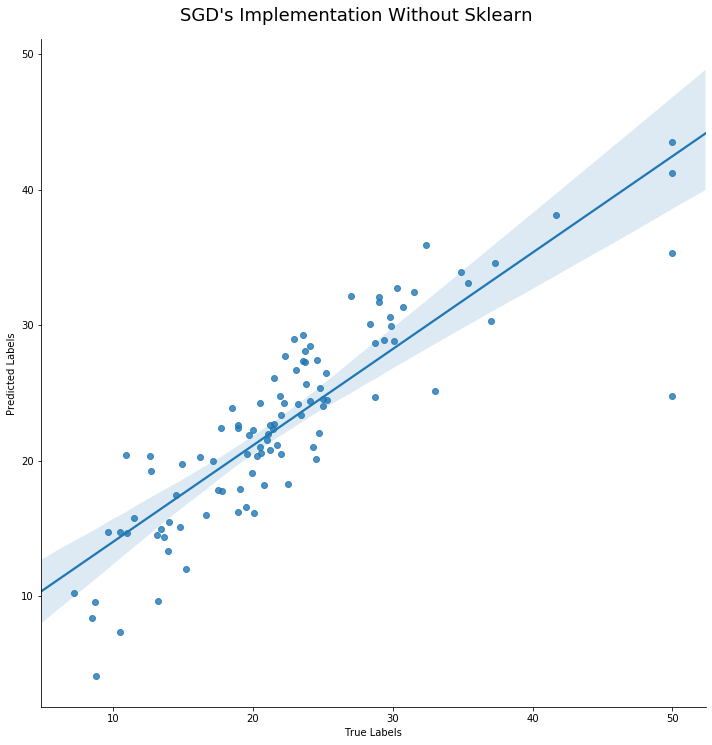

In [24]:
fig1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = df1, size = 10).fig 
fig1.suptitle("SGD's Implementation Without Sklearn", fontsize=18, y=1.03)
fig1.show()

In [25]:
X = standardized_train_df.drop("PRICE", axis = 1, inplace = False)
Y = Y_train
X_te = standardized_test_df.drop("PRICE", axis = 1, inplace = False)
Y_te = Y_test
clf = SGDRegressor(shuffle = False, learning_rate= 'invscaling', max_iter = 5000)
clf.fit(X, Y)# fir train data
Y_pred = clf.predict(X_te)# predict test error
print("Weight = "+str(clf.coef_))
print("Y Intercept = "+str(clf.intercept_))

Weight = [-0.94554351  1.05190329 -0.12895158  0.63797891 -2.185374    2.60099438
 -0.14401095 -3.34889106  2.73055477 -1.98842653 -2.3150537   0.75699472
 -3.72076626]
Y Intercept = [22.57838697]


In [26]:
d2 = {'True Labels': Y_te, 'Predicted Labels': Y_pred}
df2 = pd.DataFrame(data = d2)
df2

,True Labels,Predicted Labels
0,30.7,31.963188
1,21.5,24.946039
2,14.0,13.239594
3,20.8,18.680453
4,13.2,9.106476
...,...,...
97,14.8,14.639654
98,50.0,33.968334
99,24.3,19.971228
100,24.5,21.077130


In [27]:
Mean_Sq_Error = mean_squared_error(Y_te, Y_pred)
Mean_Sq_Error

21.15212674927223

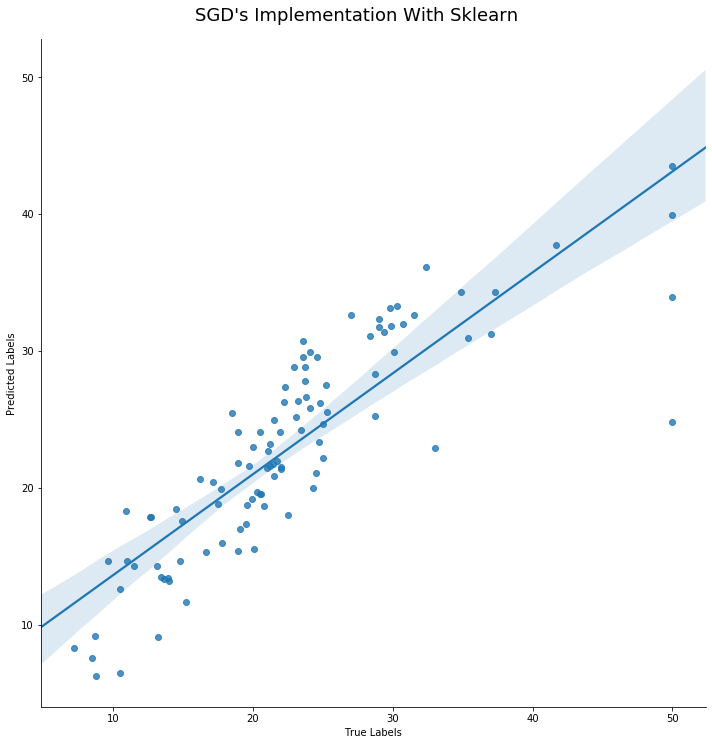

In [28]:
fig2 = sns.lmplot(x="True Labels", y="Predicted Labels", data = df2, size = 10).fig
fig2.suptitle("SGD's Implementation With Sklearn", fontsize=18, y=1.03)
fig2.show()

## Summary
* Mean Squared Error obtained by my implementation of SGD is 19.79642605519233
* Mean Squared Error obtained by Sklearn's implementation of SGD is 21.15212674927223